In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sb
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data= pd.read_csv("tweets.csv")

In [ ]:
data.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
data.shape

(31962, 3)

In [ ]:
data.drop(columns=['id'],axis=1,inplace=True)
data.head()


,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
#check the class  distribution
data["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

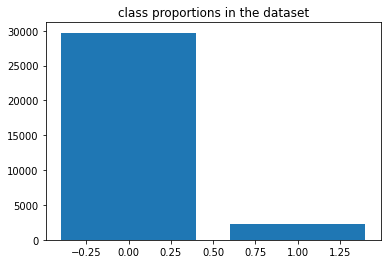

In [ ]:
plt.bar([0,1],data["label"].value_counts())
plt.title("class proportions in the dataset")
plt.show()

In [ ]:
dff = data.drop(['label'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(dff,list(data.label), test_size=0.1)


In [ ]:
X_test.shape

(3197, 1)

In [ ]:
X_temp['label'] = y_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:

X_temp.head()

,tweet,label
29079,its been years and months. i love you! mont...,0
25930,proof that not every monday morning has suck. ...,0
20415,happy bihday to my husband! i wish he had an ...,0
22050,ðð°ððð #pastel #milhojas #25 @...,0
25075,bihday raheel sharif... #have a great happy ...,0


In [ ]:
type(X_temp)

pandas.core.frame.DataFrame

In [ ]:
nonhate = X_temp[X_temp['label'] == 0]

In [ ]:
nonhate.head()

,tweet,label
29079,its been years and months. i love you! mont...,0
25930,proof that not every monday morning has suck. ...,0
20415,happy bihday to my husband! i wish he had an ...,0
22050,ðð°ððð #pastel #milhojas #25 @...,0
25075,bihday raheel sharif... #have a great happy ...,0


In [ ]:
hate = X_temp[X_temp.label == 1]

In [ ]:
hate.shape

(2005, 2)

In [ ]:
nonhatesample = nonhate.sample(n = hate.shape[0])

In [ ]:
nonhatesample.head()

,tweet,label
19746,fathers day :),0
24816,â #usd/cad breaks below 1.29 on data #blo...,0
31315,"oh my punjab, what has happened to you? you we...",0
11235,what would you rather do? #fire #warm #winter...,0
18228,@user fighting battles that have already been...,0


In [ ]:
nonhatesample.shape

(2005, 2)

In [ ]:
ds = pd.concat([hate, nonhatesample], axis = 0)

In [ ]:
ds.shape

(4010, 2)

In [ ]:
testdf = X_test
testdf['label'] = y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
testdf.shape

(3197, 2)

In [ ]:

ds = pd.concat([ds, testdf], axis = 0)

In [ ]:
ds.head()

,tweet,label
22058,racist austin police ofc cameron staff #camer...,1
2023,"@user ""people of colour do not enjoy equality ...",1
11469,what over-rode journalists' integrity was gree...,1
9762,are â¦ #black &amp; feel like the are stompi...,1
10006,#ufc champ #amandanunes gets $200k for beating...,1


In [ ]:
ds.shape

(7207, 2)

In [ ]:
#check the class  distribution
ds["label"].value_counts()

0    4965
1    2242
Name: label, dtype: int64

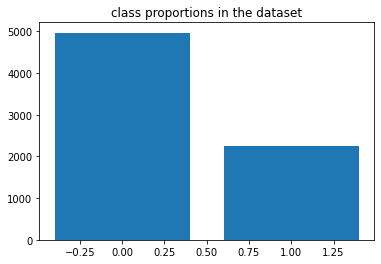

In [ ]:
plt.bar([0,1],ds["label"].value_counts())
plt.title("class proportions in the dataset")
plt.show()

In [ ]:
ds.to_csv("tweets.csv")

In [ ]:
ds = pd.read_csv("tweets.csv")

In [ ]:
ds.head()

,Unnamed: 0,tweet,label
0,22058,racist austin police ofc cameron staff #camer...,1
1,2023,"@user ""people of colour do not enjoy equality ...",1
2,11469,what over-rode journalists' integrity was gree...,1
3,9762,are â¦ #black &amp; feel like the are stompi...,1
4,10006,#ufc champ #amandanunes gets $200k for beating...,1


In [ ]:
#Code to remove @
#ds['tweet'] = ds['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))

In [ ]:
#ds.head()

In [ ]:
#Removing numbers
ds['tweet'] = ds['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*']))

In [ ]:
ds.head()

,Unnamed: 0,tweet,label
0,22058,racist austin police ofc cameron staff #camero...,1
1,2023,"@user ""people of colour do not enjoy equality ...",1
2,11469,what over-rode journalists' integrity was gree...,1
3,9762,are â¦ #black &amp; feel like the are stompin...,1
4,10006,#ufc champ #amandanunes gets $200k for beating...,1


In [ ]:
#removing # sign and &
def clean(text):
  text=re.sub(r"#"," ",text)
  text=re.sub(r"&[a-z]+"," ",text)
  text=re.sub(r"@[a-zA-Z]+"," ",text )
  return text

In [ ]:
ds["tweet"]=ds["tweet"].apply(clean)
ds.head()

,Unnamed: 0,tweet,label
0,22058,racist austin police ofc cameron staff camero...,1
1,2023,"""people of colour do not enjoy equality with...",1
2,11469,what over-rode journalists' integrity was gree...,1
3,9762,are â¦ black ; feel like the are stomping o...,1
4,10006,ufc champ amandanunes gets $200k for beating...,1


In [ ]:
#Code for removing slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} ## Need a huge dictionary
words = "I luv kashmir"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)

In [ ]:
reformed

'I love kashmir'

In [ ]:
ds['tweet'] = ds['tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [ ]:
#Removing stopwords
ds['tweet'] = ds['tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [ ]:
ds.head(10)

,Unnamed: 0,tweet,label
0,22058,racist austin police ofc cameron staff cameron...,1
1,2023,"""people colour enjoy equality within lgbtq com...",1
2,11469,over-rode journalists' integrity greed ambitio...,1
3,9762,â¦ black ; feel like stomping you? listen ret...,1
4,10006,ufc champ amandanunes gets $200k beating ronda...,1
5,9813,stunning response plan nominate muslimbrotherh...,1
6,6639,misogyny alive well left. never let tell isn't.,1
7,7556,"4 blackpeople beat whiteperson ? no, 3 bp migh...",1
8,5500,allahsoil lehman brothers went belly-up septem...,1
9,18079,âanti-islamistâ rally organiser neilerikso...,1


In [ ]:
#Stemming
ps = PorterStemmer()
ds['tweet'] = ds['tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [ ]:
ds.head()

,Unnamed: 0,tweet,label
0,22058,racist austin polic ofc cameron staff camerons...,1
1,2023,"""peopl colour enjoy equal within lgbtq communi...",1
2,11469,"over-rod journalists' integr greed ambition, a...",1
3,9762,â¦ black ; feel like stomp you? listen retwee...,1
4,10006,ufc champ amandanun get $200k beat rondarousey...,1


In [ ]:
ds.to_csv("tweets.csv")

In [ ]:
data=pd.read_csv("tweets.csv")

In [ ]:
data.shape

(7207, 4)

In [ ]:
data=data.loc[:,["tweet","label"]]

In [ ]:
data.head()

,tweet,label
0,racist austin polic ofc cameron staff camerons...,1
1,"""peopl colour enjoy equal within lgbtq communi...",1
2,"over-rod journalists' integr greed ambition, a...",1
3,â¦ black ; feel like stomp you? listen retwee...,1
4,ufc champ amandanun get $200k beat rondarousey...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X = cv.fit_transform(data["tweet"].values.astype('U')).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,data["label"],random_state=5, test_size=0.15)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score , accuracy_score , confusion_matrix

In [ ]:
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred= model.predict(X_test)

In [ ]:
f1_score(y_test,pred)

0.8299531981279251

In [ ]:
accuracy_score(y_test,pred)

0.899260628465804

In [ ]:
confusion_matrix(y_test,pred)

array([[707,  28],
       [ 81, 266]])

In [ ]:

from sklearn.ensemble import RandomForestClassifier

In [ ]:
randmodel=RandomForestClassifier()

In [ ]:
randmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
randpred=randmodel.predict(X_test)

In [ ]:
f1_score(randpred,y_test)

0.8005780346820809

In [ ]:
accuracy_score(randpred,y_test)

0.8724584103512015

In [ ]:
confusion_matrix(y_test,randpred)

array([[667,  68],
       [ 70, 277]])